In [13]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from sklearn.decomposition import PCA
from tqdm.notebook import tqdm

import sys
sys.path.insert(0, '../../src/')
#from neuralnetwork import *
from analysis import *
from utils import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Trainability

In [14]:
qcn_list = loader(data_path("boston_qcn"))
dnn_list = loader(data_path("boston_dnn_pca"))

In [15]:
loss1 = np.array([qcn.loss for qcn in qcn_list])
std1 = np.std(loss1, axis=0)/2
avg1 = np.mean(loss1, axis=0)

loss2 = np.array([dnn.loss for dnn in dnn_list])
std2 = np.std(loss2, axis=0)/2
avg2 = np.mean(loss2, axis=0)

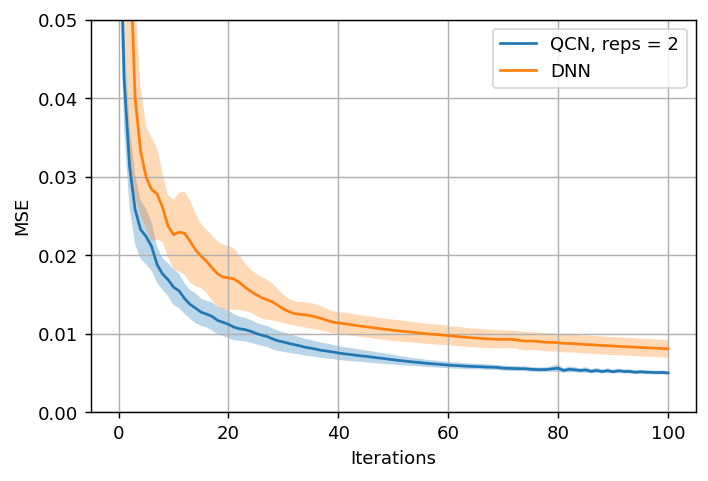

In [16]:
alpha = 0.3
epochs = list(range(101))

fig=plt.figure(figsize=(6,4), dpi=130, facecolor='w', edgecolor='k')

plt.fill_between(epochs, avg1 - std1, avg1 + std1, alpha=alpha)
plt.fill_between(epochs, avg2 - std2, avg2 + std2, alpha=alpha)
plt.plot(epochs, avg1)
plt.plot(epochs, avg2)

plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.legend(["QCN, reps = 2", "DNN"])
plt.grid()
plt.ylim([0, 0.05])
plt.show()

fig.savefig(image_path("1D_gaussian_data_fit.pdf"), bbox_inches='tight')

## Hybrid

In [28]:
qnn_list1 = loader(data_path("trainability_qcn_2D_reps_1"))
qnn_list2 = loader(data_path("trainability_qcn_2D_reps_2"))
dnn_list1 = loader(data_path("trainability_dnn_2D_epochs_100"))
dnn_list2 = loader(data_path("trainability_dnn_2D_epochs_10000"))

In [29]:
loss1 = np.array([qnn.loss for qnn in qnn_list1])
std1 = np.std(loss1, axis=0)
avg1 = np.mean(loss1, axis=0)

loss2 = np.array([qnn.loss for qnn in qnn_list2])
std2 = np.std(loss2, axis=0)
avg2 = np.mean(loss2, axis=0)

loss3 = np.array([dnn.loss for dnn in dnn_list1])
std3 = np.std(loss3, axis=0)
avg3 = np.mean(loss3, axis=0)

loss4 = np.array([dnn.loss for dnn in dnn_list2])
std4 = np.std(loss4, axis=0)
avg4 = np.mean(loss4, axis=0)

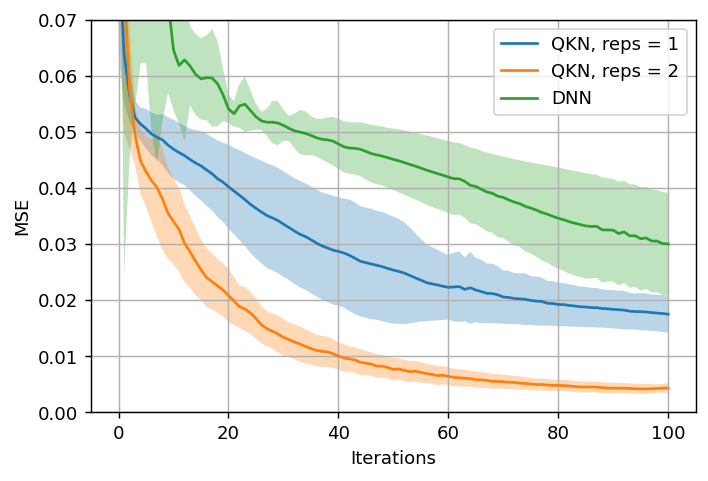

In [30]:
alpha = 0.3
epochs = list(range(101))

fig=plt.figure(figsize=(6,4), dpi=130, facecolor='w', edgecolor='k')

plt.fill_between(epochs, avg1 - std1, avg1 + std1, alpha=alpha)
plt.fill_between(epochs, avg2 - std2, avg2 + std2, alpha=alpha)
plt.fill_between(epochs, avg3 - std3, avg3 + std3, alpha=alpha)
plt.plot(epochs, avg1)
plt.plot(epochs, avg2)
plt.plot(epochs, avg3)

plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.ylim([0, 0.07])
plt.legend(["QKN, reps = 1", "QKN, reps = 2", "DNN"])
plt.grid()
plt.show()

fig.savefig(image_path("2D_gaussian_data_fit.pdf"), bbox_inches='tight')

In [31]:
print(avg1[-1], avg2[-1], avg3[-1], avg4[-1])

0.0174681050083941 0.0042669767476713385 0.02998121600426848 0.0046639367778752334


## 3D

In [32]:
np.random.seed(42)

n = 6
x = np.linspace(0, 1, n)
x = generate_meshgrid([x, x, x])

mean1 = np.array([[0.25, 0.25, 0.25]])
mean2 = np.array([[0.25, 0.25, 0.75]])
mean3 = np.array([[0.25, 0.75, 0.75]])
mean4 = np.array([[0.25, 0.75, 0.25]])

mean5 = np.array([[0.75, 0.25, 0.25]])
mean6 = np.array([[0.75, 0.25, 0.75]])
mean7 = np.array([[0.75, 0.75, 0.75]])
mean8 = np.array([[0.75, 0.75, 0.25]])

var = np.array([[0.02, 0, 0], [0, 0.02, 0], [0, 0, 0.02]])

y = gaussian(x, mean1, var) - gaussian(x, mean2, var) + gaussian(x, mean3, var) - gaussian(x, mean4, var) - gaussian(x, mean5, var) + gaussian(x, mean6, var) - gaussian(x, mean7, var) + gaussian(x, mean8, var)

x_qnn = scaler(x, a=-np.pi/2, b=np.pi/2)
x_dnn = scaler(x, mode="standard")
y = scaler(y, a=0, b=1)

In [33]:
qnn_list1 = loader(data_path("trainability_qcn_3D_reps_1"))
qnn_list2 = loader(data_path("trainability_qcn_3D_reps_2"))
dnn_list1 = loader(data_path("trainability_dnn_3D_epochs_100"))
dnn_list2 = loader(data_path("trainability_dnn_3D_epochs_10000"))

In [34]:
loss1 = np.array([qnn.loss for qnn in qnn_list1])
std1 = np.std(loss1, axis=0)
avg1 = np.mean(loss1, axis=0)

loss2 = np.array([qnn.loss for qnn in qnn_list2])
std2 = np.std(loss2, axis=0)
avg2 = np.mean(loss2, axis=0)

loss3 = np.array([dnn.loss for dnn in dnn_list1])
std3 = np.std(loss3, axis=0)
avg3 = np.mean(loss3, axis=0)

loss4 = np.array([dnn.loss for dnn in dnn_list2])
std4 = np.std(loss4, axis=0)
avg4 = np.mean(loss4, axis=0)

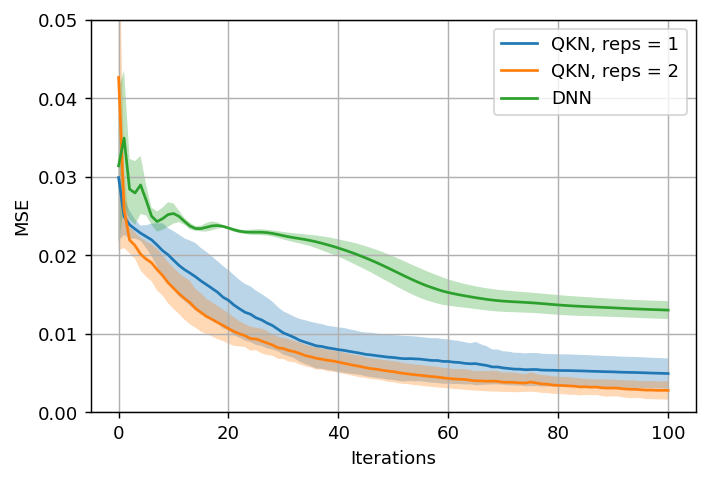

In [35]:
alpha = 0.3
epochs = list(range(101))

fig=plt.figure(figsize=(6,4), dpi=130, facecolor='w', edgecolor='k')

plt.fill_between(epochs, avg1 - std1, avg1 + std1, alpha=alpha)
plt.fill_between(epochs, avg2 - std2, avg2 + std2, alpha=alpha)
plt.fill_between(epochs, (avg3 - std3)[:101], (avg3 + std3)[:101], alpha=alpha)
plt.plot(epochs, avg1)
plt.plot(epochs, avg2)
plt.plot(epochs, avg3[:101])

plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.ylim([0, 0.05])
plt.legend(["QKN, reps = 1", "QKN, reps = 2", "DNN"])
plt.grid()
plt.show()

fig.savefig(image_path("3D_gaussian_data_fit.pdf"), bbox_inches='tight')

In [36]:
print(avg1[-1], avg2[-1], avg3[-1], avg4[-1])

0.004913696605083884 0.0027729970526418042 0.012991440759601819 0.0031249025157559576


### Noisy

In [37]:
qnn_list1 = loader(data_path("trainability_qcn_1D_reps_1_noisy"))
qnn_list2 = loader(data_path("trainability_qcn_1D_reps_2_noisy"))
dnn_list1 = loader(data_path("trainability_dnn_1D_epochs_100"))
dnn_list2 = loader(data_path("trainability_dnn_1D_epochs_10000"))

In [38]:
loss1 = np.array([qnn.loss for qnn in qnn_list1])
std1 = np.std(loss1, axis=0)/2
avg1 = np.mean(loss1, axis=0)

loss2 = np.array([qnn.loss for qnn in qnn_list2])
std2 = np.std(loss2, axis=0)/2
avg2 = np.mean(loss2, axis=0)

loss3 = np.array([dnn.loss for dnn in dnn_list1])
std3 = np.std(loss3, axis=0)/2
avg3 = np.mean(loss3, axis=0)

loss4 = np.array([dnn.loss for dnn in dnn_list2])
std4 = np.std(loss4, axis=0)/2
avg4 = np.mean(loss4, axis=0)

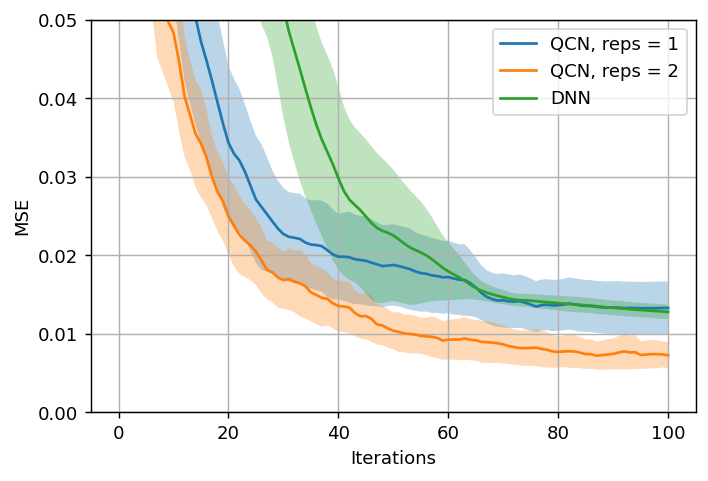

In [39]:
alpha = 0.3
epochs = list(range(101))

fig=plt.figure(figsize=(6,4), dpi=130, facecolor='w', edgecolor='k')

plt.fill_between(epochs, avg1 - std1, avg1 + std1, alpha=alpha)
plt.fill_between(epochs, avg2 - std2, avg2 + std2, alpha=alpha)
plt.fill_between(epochs, avg3 - std3, avg3 + std3, alpha=alpha)
plt.plot(epochs, avg1)
plt.plot(epochs, avg2)
plt.plot(epochs, avg3[:101])

plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.legend(["QCN, reps = 1", "QCN, reps = 2", "DNN"])
plt.grid()
plt.ylim([0, 0.05])
plt.show()

fig.savefig(image_path("1D_gaussian_data_fit_noisy.pdf"), bbox_inches='tight')

In [24]:
print(avg1[-1], avg2[-1], avg3[-1], avg4[-1])

0.013259886649195826 0.007642182912257071 0.012761801860462893 0.00039880464681009913
